# DATA ANALYTICS
## ASSIGNMENT - 1

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Part-1
QUESTION 1

##### Data Pre-processing (Cleaning)

In [5]:
import DataCleaning as dc
#need to clean education and fnlwgt columns here


In [6]:
# Load your dataset using your cleaning module
original_df, working_df = dc.load_dataset("M25_DA_A1_Dataset1.csv")
original_df, temporary_df=dc.load_dataset("M25_DA_A1_Dataset1.csv") #For q4

# Check and clean the Education column first
print("Cleaning Education column...")

# Ensure correct data type (convert to string if needed)
working_df = dc.ensure_data_type(working_df, "Education", "str")
working_df = dc.check_missing_values(working_df, "Education")



Dataset loaded successfully with shape: (48843, 15)
Dataset loaded successfully with shape: (48843, 15)
Cleaning Education column...
Column 'Education' current dtype: object
Column 'Education' converted to str.
Final dtype of column 'Education': object
Checking column: Education
Rows detected for missing/invalid values in 'Education':
                        Age Workclass  fnlwgt Education  Education_Num  \
32561  |1x3 Cross validator       NaN     NaN       nan            NaN   

      Martial_Status Occupation Relationship Race  Sex  Capital_Gain  \
32561            NaN        NaN          NaN  NaN  NaN           NaN   

       Capital_Loss  Hours_per_week Country Target  
32561           NaN             NaN     NaN    NaN  
Deleted all rows detected. New shape: (48842, 15)


Check complete.


In [7]:
# Check and clean the fnlwgt column now
print("Cleaning fnlwgt column...")


# Ensure correct data type (convert to string if needed)
working_df = dc.ensure_data_type(working_df, "fnlwgt", "numeric")
working_df = dc.check_missing_values(working_df, "fnlwgt")


Cleaning fnlwgt column...
Column 'fnlwgt' current dtype: float64
Column 'fnlwgt' converted to numeric.
Final dtype of column 'fnlwgt': float64
Checking column: fnlwgt
No missing or invalid values found in column 'fnlwgt'.
Check complete.


In [8]:
working_df = dc.detect_outliers_iqr(working_df, "fnlwgt")

Outliers found in column 'fnlwgt':
      Age      Workclass     fnlwgt      Education  Education_Num  \
312    19            NaN   860348.0   Some-college           10.0   
414    31      State-gov  1033222.0   Some-college           10.0   
1597   37        Private   910398.0      Bachelors           13.0   
5369   30        Private  1184622.0   Some-college           10.0   
5423   33      State-gov   913447.0   Some-college           10.0   
7934   43        Private   972354.0   Some-college           10.0   
8258   35        Private  1226583.0      Bachelors           13.0   
8485   26        Private   917220.0           12th            8.0   
9748   23        Private  1038553.0        HS-grad            9.0   
12263  34        Private   849857.0        HS-grad            9.0   
14414  32        Private   857532.0        HS-grad            9.0   
14449  25        Private  1484705.0   Some-college           10.0   
15044  36    Federal-gov   930948.0   Some-college           10.0   

In [9]:
print("\nDataset cleaning completed!")
print(f"Final dataset shape: {working_df.shape}")


Dataset cleaning completed!
Final dataset shape: (48842, 15)


Question continued...

{'Bachelors': 1511601409.0, 'HS-grad': 2977279353.0, '11th': 353525318.0, 'Masters': 482192559.0, '9th': 150449180.0, 'Some-college': 2066871041.0, 'Assoc-acdm': 310113821.0, 'Assoc-voc': 369786888.0, '7th-8th': 179147014.0, 'Doctorate': 109349744.0, 'Prof-school': 155612621.0, '5th-6th': 116998125.0, '10th': 272983724.0, '1st-4th': 58050070.0, 'Preschool': 19832208.0, '12th': 129782587.0}


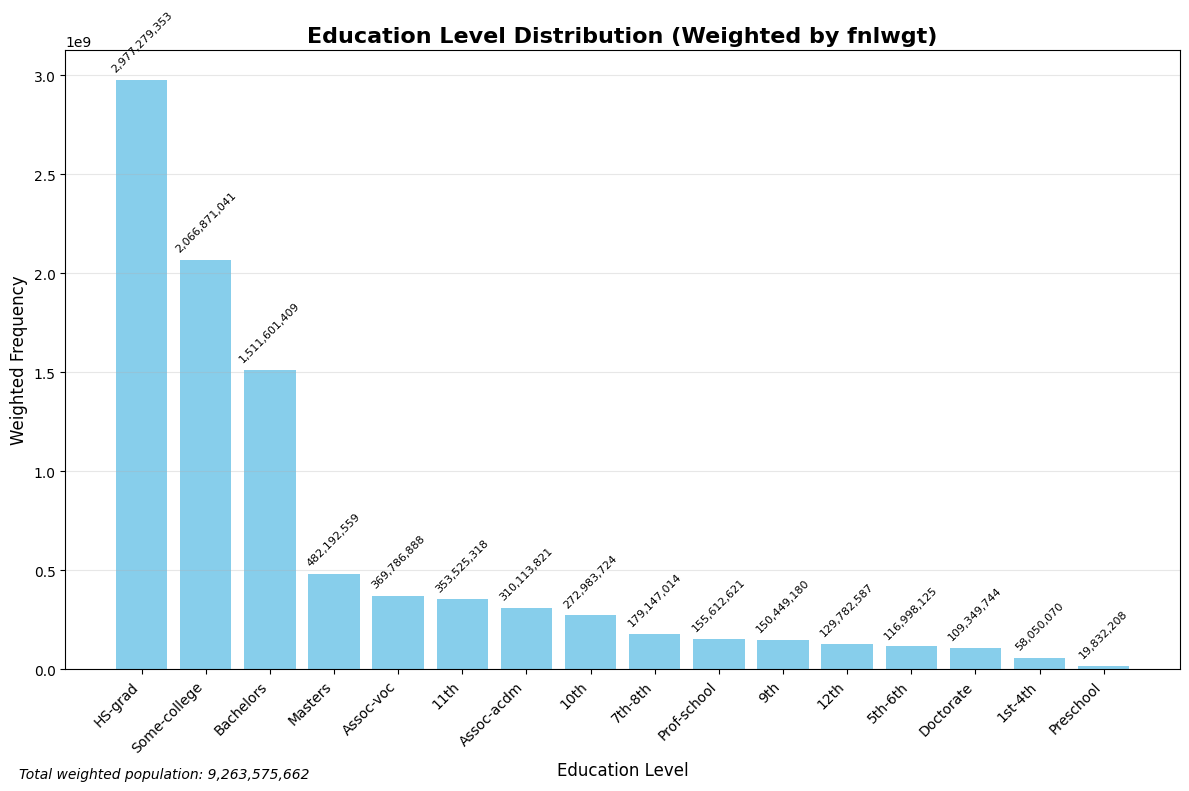


Grouped Education Frequencies:

Elementary Education (until class 8th) : 374027417.0
Secondary Education (class 9th-10th) : 3400712257.0
Senior Secondary Education (class 11th-12th) : 483307905.0
Associate degree : 679900709.0
Some college : 2066871041.0
Graduation : 1511601409.0
Post-graduation : 747154924.0

DataFrame for Plotting:

                                        Category         level        fnlwgt
0         Elementary Education (until class 8th)     Preschool  1.983221e+07
1         Elementary Education (until class 8th)       1st-4th  5.805007e+07
2         Elementary Education (until class 8th)       5th-6th  1.169981e+08
3         Elementary Education (until class 8th)       7th-8th  1.791470e+08
4           Secondary Education (class 9th-10th)           9th  1.504492e+08
5           Secondary Education (class 9th-10th)          10th  2.729837e+08
6           Secondary Education (class 9th-10th)       HS-grad  2.977279e+09
7   Senior Secondary Education (class 11th-12t

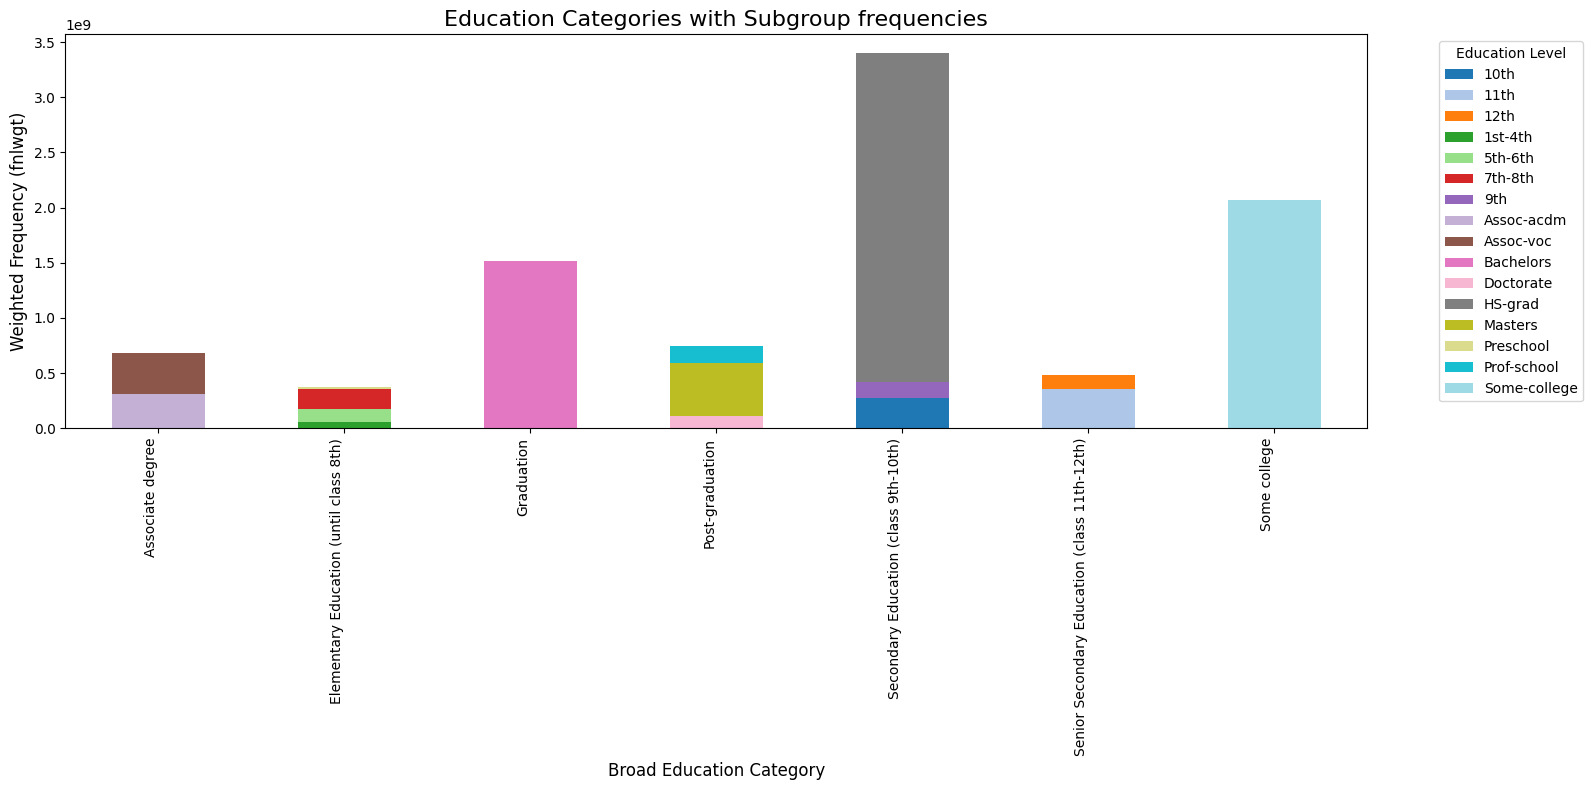

In [10]:


# fd=pd.read_csv("M25_DA_A1_Dataset1.csv")
# print(fd)

#iterate through rows using iterrows
#iterrows returns an iterator that yields each row as a tuple containing the index and the row data as a Series

education_freq={}
for index, row in working_df.iterrows():
    education=str(row["Education"]).strip() #to remove any leading or trailing spaces, convrted to str because otherwise strip wasnt allowed on floating point values
    sample_wt=row["fnlwgt"]

    if education in education_freq:
        education_freq[education] += sample_wt 
    else:
        education_freq[education] = sample_wt 

print(education_freq)


# Convert the dictionary to a DataFrame for easier plotting
education_df = pd.DataFrame(list(education_freq.items()), columns=['Education', 'Weighted_Frequency'])
education_df = education_df.sort_values('Weighted_Frequency', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(education_df['Education'], education_df['Weighted_Frequency'], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(education_df['Weighted_Frequency'])*0.01,
             f'{height:,.0f}', ha='center', va='bottom', fontsize=8,rotation=45)

plt.title('Education Level Distribution (Weighted by fnlwgt)', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Weighted Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Add some statistics to the plot
total = education_df['Weighted_Frequency'].sum()
plt.figtext(0.02, 0.02, f'Total weighted population: {total:,.0f}', fontsize=10, style='italic')

plt.show()

# NOW WE WILL GROUP THESE EDUCATION LEVELS INTO BROADER CATEGORIES
custom_groups = {
    #based on the output we got
    "Elementary Education (until class 8th)": ["Preschool", "1st-4th", "5th-6th", "7th-8th"],
    "Secondary Education (class 9th-10th)": ["9th", "10th","HS-grad"],
    "Senior Secondary Education (class 11th-12th)": ["11th", "12th"],
    "Associate degree": ["Assoc-acdm", "Assoc-voc"],
    "Some college": ["Some-college"],
    "Graduation": ["Bachelors"],
    "Post-graduation": ["Masters", "Doctorate", "Prof-school"]
}

#now we need to store total fequencies across each group
grouped_freq = {}
for key,value in custom_groups.items():  #.items() returns key-value pairs
    total=0
    for val in value:
        if val in education_freq:
            total+=education_freq[val]
    grouped_freq[key]=total 

print("\nGrouped Education Frequencies:\n")
for key,value in grouped_freq.items():
    print(key, ":", value)
        

#VISUALIZATION

rows=[]
#columns:"Category", level:subgroup, fnlwgt:frequency
for key,value in custom_groups.items():
    for val in value:
        if val in education_freq:
            rows.append({"Category": key, "level": val, "fnlwgt": education_freq[val]})

df_plot = pd.DataFrame(rows)
print("\nDataFrame for Plotting:\n")
print(df_plot)

# PLOTTING THE GRAPH
pivot_df=df_plot.pivot(index='Category', columns='level', values='fnlwgt').fillna(0)
ax=pivot_df.plot(kind='bar', stacked=True, figsize=(16,8), cmap='tab20') # kind=bar, and stacked=true creates stacked bars, cmap=tab20 assigns distinct colors for each subgroup

plt.xticks(rotation=90,ha='right') #rotate the x axis by 90 degrees for better readability
plt.title("Education Categories with Subgroup frequencies", fontsize=16)
plt.xlabel("Broad Education Category", fontsize=12)
plt.ylabel("Weighted Frequency (fnlwgt)", fontsize=12)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
# RESET DATASET
working_df=dc.reset_dataset()

Dataset reset to original.
Dataset shape: (48843, 15)


QUESTION 2

#### CLEANING THE COLUMNS REQUIRED FIRST



In [12]:
#Distribution of ages and hours worked per week  
print("\nCleaning Age column...")
working_df = dc.check_missing_values(working_df, "Age")
working_df = dc.ensure_data_type(working_df, "Age", "numeric")  # Assuming "Age" is the age column



Cleaning Age column...
Checking column: Age
No missing or invalid values found in column 'Age'.
Check complete.
Column 'Age' current dtype: object
Column 'Age' converted to numeric.
Final dtype of column 'Age': float64


In [13]:
working_df = dc.detect_outliers_iqr(working_df, "Age")

No outliers found in column 'Age'.


In [14]:
print("\nCleaning Hours_per_week column...")
working_df = dc.ensure_data_type(working_df, "Hours_per_week", "numeric")
working_df = dc.check_missing_values(working_df, "Hours_per_week")
working_df = dc.detect_outliers_iqr(working_df, "Hours_per_week")


Cleaning Hours_per_week column...
Column 'Hours_per_week' current dtype: float64
Column 'Hours_per_week' converted to numeric.
Final dtype of column 'Hours_per_week': float64
Checking column: Hours_per_week
Rows detected for missing/invalid values in 'Hours_per_week':
       Age Workclass  fnlwgt Education  Education_Num Martial_Status  \
32561  NaN       NaN     NaN       NaN            NaN            NaN   

      Occupation Relationship Race  Sex  Capital_Gain  Capital_Loss  \
32561        NaN          NaN  NaN  NaN           NaN           NaN   

       Hours_per_week Country Target  
32561             NaN     NaN    NaN  

Proposed action: Fill 1 rows in 'Hours_per_week' with mean: 40.4224
Sample of rows that will be affected:
       Age Workclass  fnlwgt Education  Education_Num Martial_Status  \
32561  NaN       NaN     NaN       NaN            NaN            NaN   

      Occupation Relationship Race  Sex  Capital_Gain  Capital_Loss  \
32561        NaN          NaN  NaN  NaN  

In [15]:
print("\nCleaning fnlwgt column...")
working_df = dc.ensure_data_type(working_df, "fnlwgt", "numeric")
working_df = dc.check_missing_values(working_df, "fnlwgt")
working_df = dc.detect_outliers_iqr(working_df, "fnlwgt")



Cleaning fnlwgt column...
Column 'fnlwgt' current dtype: float64
Column 'fnlwgt' converted to numeric.
Final dtype of column 'fnlwgt': float64
Checking column: fnlwgt
Rows detected for missing/invalid values in 'fnlwgt':
       Age Workclass  fnlwgt Education  Education_Num Martial_Status  \
32561  NaN       NaN     NaN       NaN            NaN            NaN   

      Occupation Relationship Race  Sex  Capital_Gain  Capital_Loss  \
32561        NaN          NaN  NaN  NaN           NaN           NaN   

       Hours_per_week Country Target  
32561       40.422382     NaN    NaN  
Deleted all rows detected. New shape: (48842, 15)


Check complete.
Outliers found in column 'fnlwgt':
        Age      Workclass     fnlwgt      Education  Education_Num  \
312    19.0            NaN   860348.0   Some-college           10.0   
414    31.0      State-gov  1033222.0   Some-college           10.0   
1597   37.0        Private   910398.0      Bachelors           13.0   
5369   30.0        Privat

     Age    Frequency
0   17.0  106598922.0
1   18.0  166728967.0
2   19.0  215777445.0
3   20.0  220459159.0
4   21.0  219449363.0
..   ...          ...
69  86.0     149912.0
70  87.0     331207.0
71  88.0     897244.0
72  89.0     181945.0
73  90.0    9369040.0

[74 rows x 2 columns]


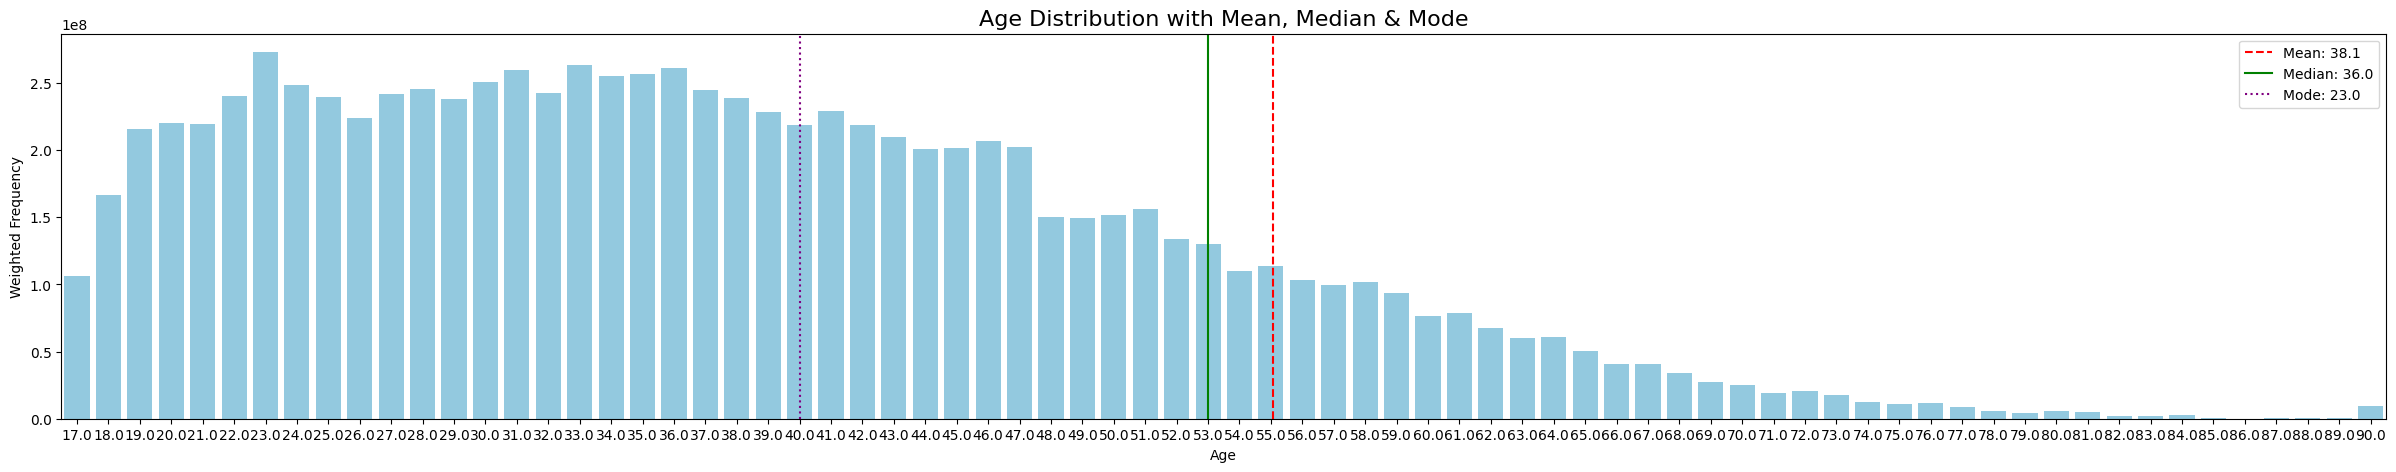

    Hours_per_Week  Hours_Frequency
0              1.0        4961487.0
1              2.0       10290713.0
2              3.0       10908541.0
3              4.0       13919826.0
4              5.0       16516928.0
..             ...              ...
91            95.0         299070.0
92            96.0        2595205.0
93            97.0         332823.0
94            98.0        2481787.0
95            99.0       22696260.0

[96 rows x 2 columns]


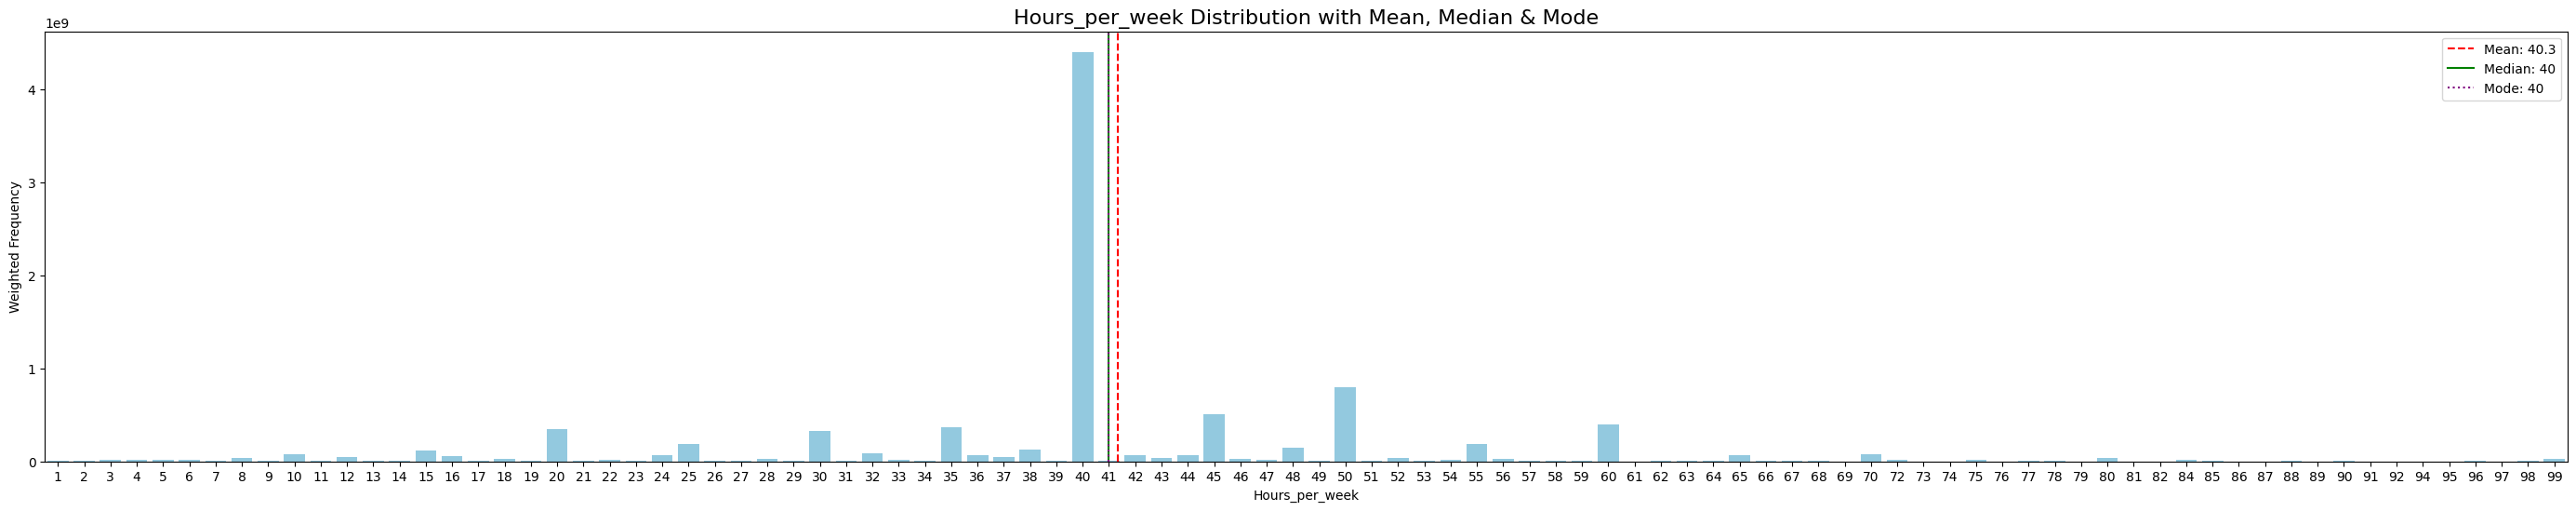

In [16]:
# AGES

working_df['Age']=pd.to_numeric(working_df['Age'], errors='coerce')
age_freq=working_df.groupby('Age')['fnlwgt'].sum().reset_index()
age_freq.columns=['Age', 'Frequency']  #renames the columns as age anf frequency
print(age_freq)

plt.figure(figsize=(30,5))
sns.barplot(x='Age', y='Frequency', data=age_freq, color='skyblue')

# Calculate stats
mean_age = np.average(age_freq['Age'], weights=age_freq['Frequency'])
median_age = age_freq.loc[age_freq['Frequency'].cumsum() >= age_freq['Frequency'].sum()/2, 'Age'].iloc[0]
mode_age = age_freq.loc[age_freq['Frequency'].idxmax(), 'Age']

# Add vertical lines
plt.axvline(mean_age, color='red', linestyle='--', label=f"Mean: {mean_age:.1f}")
plt.axvline(median_age, color='green', linestyle='-', label=f"Median: {median_age}")
plt.axvline(mode_age, color='purple', linestyle=':', label=f"Mode: {mode_age}")

plt.title('Age Distribution with Mean, Median & Mode', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Weighted Frequency')
plt.legend()
plt.show()

# HOURS WORKED PER WEEK


# Convert Hours_per_week to numeric
working_df['Hours_per_week'] = pd.to_numeric(working_df['Hours_per_week'], errors='coerce')

# Group by Hours_per_week and sum fnlwgt
hours_freq = working_df.groupby('Hours_per_week')['fnlwgt'].sum().reset_index()
hours_freq.columns = ['Hours_per_Week', 'Hours_Frequency']

print(hours_freq)
hours_freq['Hours_per_Week'] = hours_freq['Hours_per_Week'].astype(int)

# Plot barplot
plt.figure(figsize=(35,6))
sns.barplot(x='Hours_per_Week', y='Hours_Frequency', data=hours_freq, color='skyblue')

# Calculate weighted stats
mean_hours = np.average(hours_freq['Hours_per_Week'], weights=hours_freq['Hours_Frequency'])
median_hours = hours_freq.loc[hours_freq['Hours_Frequency'].cumsum() >= hours_freq['Hours_Frequency'].sum()/2, 'Hours_per_Week'].iloc[0]
mode_hours = hours_freq.loc[hours_freq['Hours_Frequency'].idxmax(), 'Hours_per_Week']

# Add vertical lines
plt.axvline(mean_hours, color='red', linestyle='--', label=f"Mean: {mean_hours:.1f}")
plt.axvline(median_hours, color='green', linestyle='-', label=f"Median: {median_hours}")
plt.axvline(mode_hours, color='purple', linestyle=':', label=f"Mode: {mode_hours}")

plt.title('Hours_per_week Distribution with Mean, Median & Mode', fontsize=16)
plt.xlabel('Hours_per_week')
plt.ylabel('Weighted Frequency')
plt.legend()
plt.show()



Hours_per_week:
Part-time, full-time, over-time

Age:
0<Child<18, 18<=Youth<30, 30<=Adult<50, 50<=Senior

        Age Age_Group
0      39.0     Adult
1      50.0    Senior
2      38.0     Adult
3      53.0    Senior
4      28.0     Youth
...     ...       ...
48837  39.0     Adult
48838  64.0    Senior
48839  38.0     Adult
48840  44.0     Adult
48841  35.0     Adult

[48842 rows x 2 columns]


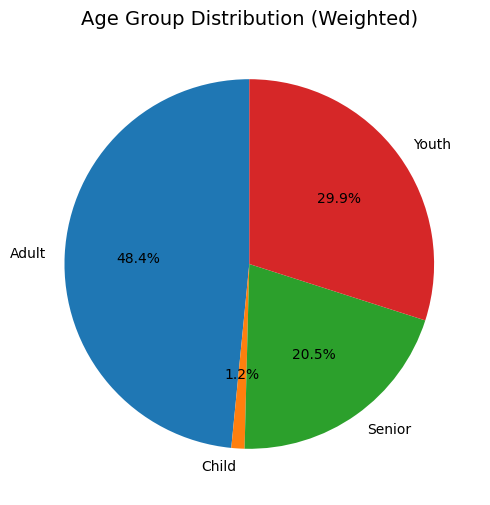

       Hours_per_week Hours_Group
0                40.0   Full-time
1                13.0   Part-time
2                40.0   Full-time
3                40.0   Full-time
4                40.0   Full-time
...               ...         ...
48837            36.0   Full-time
48838            40.0   Full-time
48839            50.0   Over-time
48840            40.0   Full-time
48841            60.0   Over-time

[48842 rows x 2 columns]


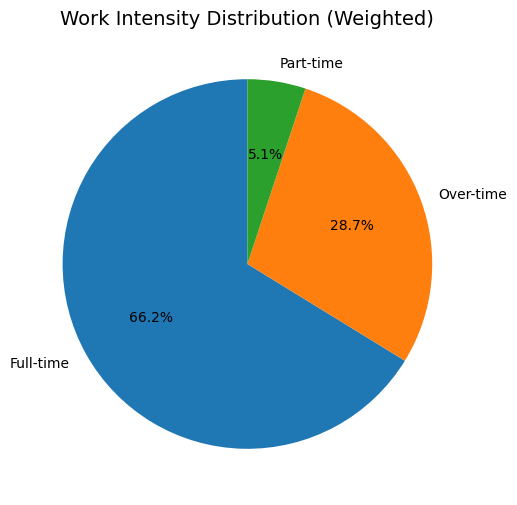

     Age       fnlwgt
0   17.0  106598922.0
1   18.0  166728967.0
2   19.0  215777445.0
3   20.0  220459159.0
4   21.0  219449363.0
..   ...          ...
69  86.0     149912.0
70  87.0     331207.0
71  88.0     897244.0
72  89.0     181945.0
73  90.0    9369040.0

[74 rows x 2 columns]
    Hours_per_week      fnlwgt
0              1.0   4961487.0
1              2.0  10290713.0
2              3.0  10908541.0
3              4.0  13919826.0
4              5.0  16516928.0
..             ...         ...
91            95.0    299070.0
92            96.0   2595205.0
93            97.0    332823.0
94            98.0   2481787.0
95            99.0  22696260.0

[96 rows x 2 columns]
       Age  Hours_per_week     fnlwgt
0     17.0             4.0   619983.0
1     17.0             5.0  1619106.0
2     17.0             6.0  1461111.0
3     17.0             7.0  1106237.0
4     17.0             8.0  3918610.0
...    ...             ...        ...
2998  90.0            50.0   532285.0
2999  90.0    

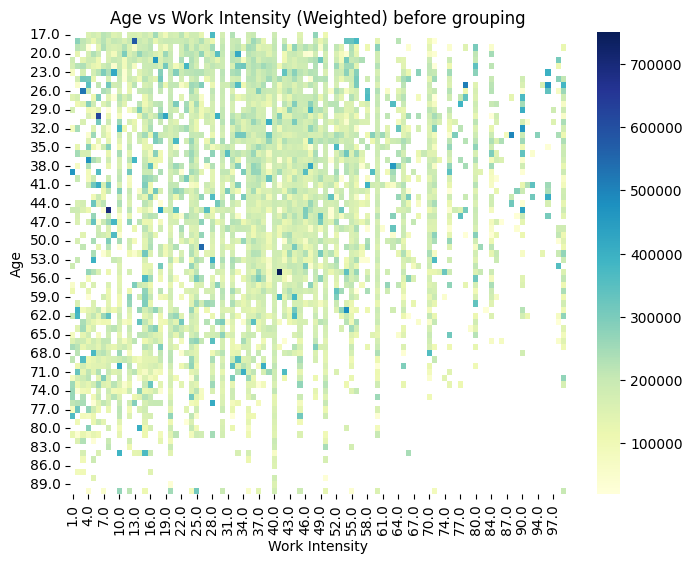

  Age_Group        fnlwgt
0     Adult  4.487723e+09
1     Child  1.065989e+08
2    Senior  1.895944e+09
3     Youth  2.773310e+09
  Hours_Group        fnlwgt
0   Full-time  6.135568e+09
1   Over-time  2.657025e+09
2   Part-time  4.709822e+08
   Age_Group Hours_Group        fnlwgt
0      Adult   Full-time  2.791471e+09
1      Adult   Over-time  1.613742e+09
2      Adult   Part-time  8.250927e+07
3      Child   Full-time  5.901201e+07
4      Child   Over-time  1.233184e+06
5      Child   Part-time  4.635373e+07
6     Senior   Full-time  1.228654e+09
7     Senior   Over-time  5.176703e+08
8     Senior   Part-time  1.496200e+08
9      Youth   Full-time  2.056432e+09
10     Youth   Over-time  5.243794e+08
11     Youth   Part-time  1.924992e+08


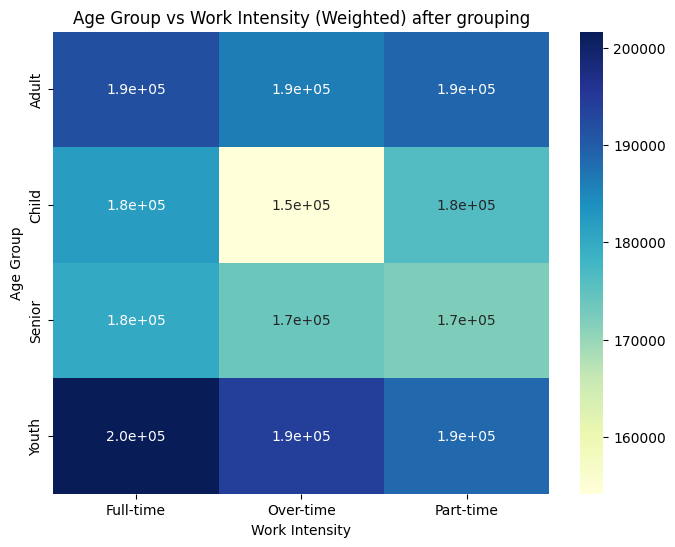

In [32]:
#GROUPING AGE
def age_group(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 30:
        return 'Youth'
    elif 30 <= age < 50:
        return 'Adult'
    else:
        return 'Senior'
working_df['Age_Group'] = working_df['Age'].apply(age_group)
print(working_df[['Age', 'Age_Group']])

# Pie chart for Age Groups
age_group_freq = working_df.groupby("Age_Group")["fnlwgt"].sum()
plt.figure(figsize=(6,6))
plt.pie(age_group_freq, labels=age_group_freq.index, autopct="%.1f%%", startangle=90)
plt.title("Age Group Distribution (Weighted)", fontsize=14)
plt.show()

#GROUPING HOURS_PER_WEEK
def hours_group(hours):
    if hours < 20:
        return 'Part-time'
    elif 20 <= hours <= 40:
        return 'Full-time'
    else:
        return 'Over-time'
working_df['Hours_Group'] = working_df['Hours_per_week'].apply(hours_group)
print(working_df[['Hours_per_week', 'Hours_Group']])

# Pie chart for Hours Groups
hours_group_freq = working_df.groupby("Hours_Group")["fnlwgt"].sum()
plt.figure(figsize=(6,6))
plt.pie(hours_group_freq, labels=hours_group_freq.index, autopct="%.1f%%", startangle=90)
plt.title("Work Intensity Distribution (Weighted)", fontsize=14)
plt.show()

# Weighted counts BEFORE grouping
age_dist = working_df.groupby('Age')['fnlwgt'].sum().reset_index()
work_dist = working_df.groupby('Hours_per_week')['fnlwgt'].sum().reset_index()
relation = working_df.groupby(['Age', 'Hours_per_week'])['fnlwgt'].sum().reset_index()
print(age_dist)
print(work_dist)
print(relation)

# HEATMAP (before grouping)
pivot_table = working_df.pivot_table(index="Age", columns="Hours_per_week", values="fnlwgt")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, cmap="YlGnBu")  # removed annot=True
plt.title("Age vs Work Intensity (Weighted) before grouping")
plt.ylabel("Age")
plt.xlabel("Work Intensity")
plt.show()

#Weighted counts using fnlwgt after Grouping
age_dist = working_df.groupby('Age_Group')['fnlwgt'].sum().reset_index()
work_dist = working_df.groupby('Hours_Group')['fnlwgt'].sum().reset_index()
relation = working_df.groupby(['Age_Group', 'Hours_Group'])['fnlwgt'].sum().reset_index()
print(age_dist)
print(work_dist)
print(relation)

#HEATMAP
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = working_df.pivot_table(index="Age_Group", columns="Hours_Group", values="fnlwgt")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".1e", cmap="YlGnBu")
plt.title("Age Group vs Work Intensity (Weighted) after grouping")
plt.ylabel("Age Group")
plt.xlabel("Work Intensity")
plt.show()

#storing for later use
age_hours_df=working_df.copy()


#### QUESTION 3

In [18]:
temporary_df=working_df
# CLEANING THE DATA

# RESET to original dataset for fresh start
# working_df = dc.reset_dataset()

# Check column names to ensure we have the right ones
print("Dataset columns:", working_df.columns.tolist())


Dataset columns: ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target', 'Age_Group', 'Hours_Group']


In [19]:
# Clean the required columns for this analysis
print("\nCleaning Capital_Gain column...")
working_df = dc.ensure_data_type(working_df, "Capital_Gain", "numeric")
working_df = dc.check_missing_values(working_df, "Capital_Gain")


Cleaning Capital_Gain column...
Column 'Capital_Gain' current dtype: float64
Column 'Capital_Gain' converted to numeric.
Final dtype of column 'Capital_Gain': float64
Checking column: Capital_Gain
No missing or invalid values found in column 'Capital_Gain'.
Check complete.


In [20]:
orking_df = dc.detect_outliers_iqr(working_df, "Capital_Gain")

Outliers found in column 'Capital_Gain':
        Age   Workclass    fnlwgt     Education  Education_Num  \
0      39.0   State-gov   77516.0     Bachelors           13.0   
8      31.0     Private   45781.0       Masters           14.0   
9      42.0     Private  159449.0     Bachelors           13.0   
59     30.0     Private  188146.0       HS-grad            9.0   
60     30.0     Private   59496.0     Bachelors           13.0   
...     ...         ...       ...           ...            ...   
48805  32.0     Private   24529.0     Assoc-voc           11.0   
48812  81.0         NaN   26711.0     Assoc-voc           11.0   
48813  60.0     Private  117909.0     Assoc-voc           11.0   
48822  40.0     Private  202168.0   Prof-school           15.0   
48840  44.0     Private   83891.0     Bachelors           13.0   

            Martial_Status          Occupation    Relationship  \
0            Never-married        Adm-clerical   Not-in-family   
8            Never-married      Pr

No rows deleted.


In [21]:
print("\nCleaning Capital_Loss column...")
working_df = dc.ensure_data_type(working_df, "Capital_Loss", "numeric")
working_df = dc.check_missing_values(working_df, "Capital_Loss")



Cleaning Capital_Loss column...
Column 'Capital_Loss' current dtype: float64
Column 'Capital_Loss' converted to numeric.
Final dtype of column 'Capital_Loss': float64
Checking column: Capital_Loss
No missing or invalid values found in column 'Capital_Loss'.
Check complete.


In [22]:
working_df = dc.detect_outliers_iqr(working_df, "Capital_Loss")


Outliers found in column 'Capital_Loss':
        Age          Workclass    fnlwgt     Education  Education_Num  \
23     43.0            Private  117037.0          11th            7.0   
32     45.0            Private  386940.0     Bachelors           13.0   
52     47.0            Private   51835.0   Prof-school           15.0   
93     30.0            Private  117747.0       HS-grad            9.0   
96     48.0   Self-emp-not-inc  191277.0     Doctorate           16.0   
...     ...                ...       ...           ...            ...   
48783  19.0            Private  156618.0       HS-grad            9.0   
48794  29.0          Local-gov  170482.0       HS-grad            9.0   
48802  51.0            Private   29887.0     Bachelors           13.0   
48814  39.0            Private  229647.0     Bachelors           13.0   
48816  43.0          Local-gov   23157.0       Masters           14.0   

            Martial_Status         Occupation    Relationship  \
23      Married-c

In [23]:
print("\nCleaning fnlwgt column...")
working_df = dc.ensure_data_type(working_df, "fnlwgt", "numeric")
working_df = dc.check_missing_values(working_df, "fnlwgt")



Cleaning fnlwgt column...
Column 'fnlwgt' current dtype: float64
Column 'fnlwgt' converted to numeric.
Final dtype of column 'fnlwgt': float64
Checking column: fnlwgt
No missing or invalid values found in column 'fnlwgt'.
Check complete.


In [24]:
working_df = dc.detect_outliers_iqr(working_df, "fnlwgt")


Outliers found in column 'fnlwgt':
        Age      Workclass     fnlwgt      Education  Education_Num  \
312    19.0            NaN   860348.0   Some-college           10.0   
414    31.0      State-gov  1033222.0   Some-college           10.0   
1597   37.0        Private   910398.0      Bachelors           13.0   
5369   30.0        Private  1184622.0   Some-college           10.0   
5423   33.0      State-gov   913447.0   Some-college           10.0   
7934   43.0        Private   972354.0   Some-college           10.0   
8258   35.0        Private  1226583.0      Bachelors           13.0   
8485   26.0        Private   917220.0           12th            8.0   
9748   23.0        Private  1038553.0        HS-grad            9.0   
12263  34.0        Private   849857.0        HS-grad            9.0   
14414  32.0        Private   857532.0        HS-grad            9.0   
14449  25.0        Private  1484705.0   Some-college           10.0   
15044  36.0    Federal-gov   930948.0   So

     Capital_Gain  Gain_Frequency
0             0.0    8.509025e+09
1           114.0    1.466199e+06
2           401.0    7.937500e+05
3           594.0    1.119437e+07
4           914.0    1.459142e+06
..            ...             ...
118       25236.0    2.946436e+06
119       27828.0    9.900163e+06
120       34095.0    1.463511e+06
121       41310.0    7.409640e+05
122       99999.0    4.527370e+07

[123 rows x 2 columns]


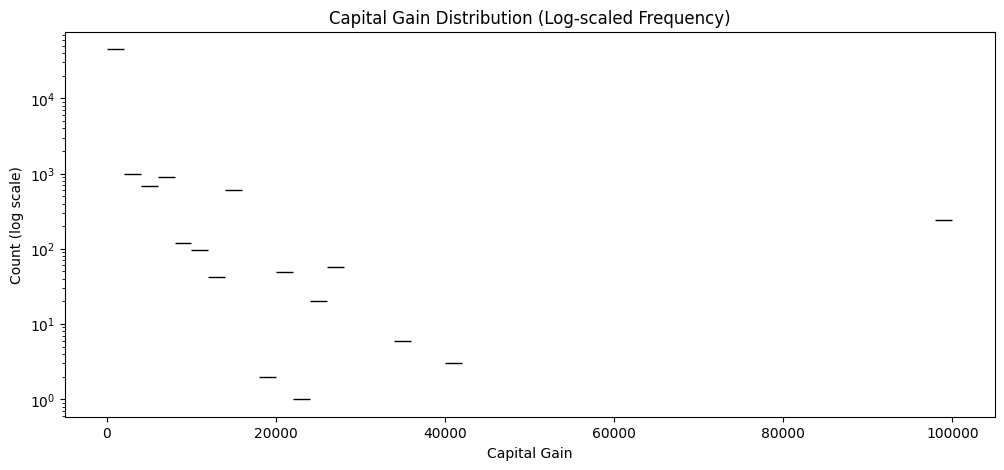

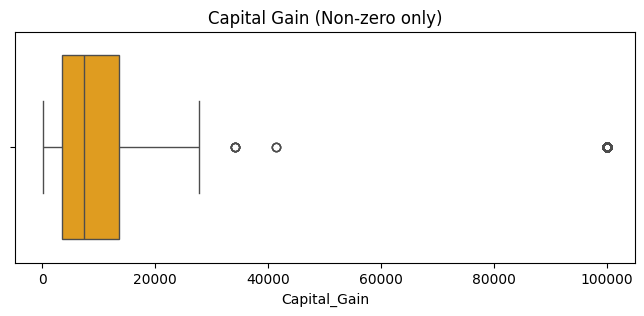

In [25]:
# CAPITAL GAIN
working_df['Capital_Gain']=pd.to_numeric(working_df['Capital_Gain'], errors='coerce')
gain_freq=working_df.groupby('Capital_Gain')['fnlwgt'].sum().reset_index()
gain_freq.columns=['Capital_Gain', 'Gain_Frequency']  #renames the columns as age anf frequency
print(gain_freq)

# Capital Gain
plt.figure(figsize=(12,5))
sns.histplot(working_df['Capital_Gain'], bins=50, color='skyblue', log_scale=(False, True))  # log y-axis
plt.title("Capital Gain Distribution (Log-scaled Frequency)")
plt.xlabel("Capital Gain")
plt.ylabel("Count (log scale)")
plt.show()

# Boxplot for non-zero Capital Gain
plt.figure(figsize=(8,3))
sns.boxplot(x=working_df[working_df['Capital_Gain'] > 0]['Capital_Gain'], color='orange')
plt.title("Capital Gain (Non-zero only)")
plt.show()


    Capital_Loss  Loss_Frequency
0            0.0    8.834501e+09
1          155.0    1.408450e+05
2          213.0    8.732690e+05
3          323.0    6.900670e+05
4          419.0    7.184570e+05
..           ...             ...
94        3175.0    1.596890e+05
95        3683.0    5.106510e+05
96        3770.0    7.672350e+05
97        3900.0    4.050220e+05
98        4356.0    3.959840e+05

[99 rows x 2 columns]


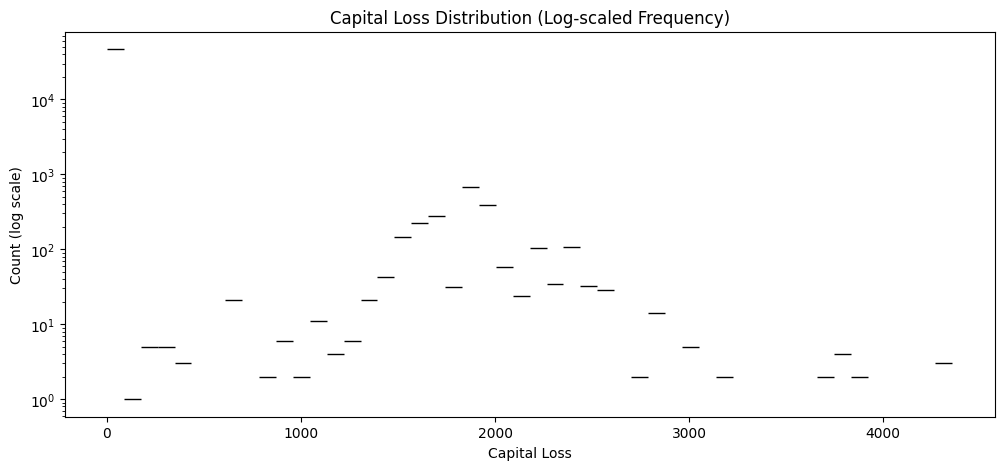

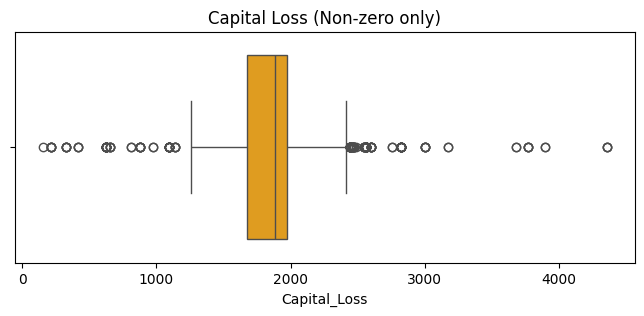

In [26]:
# CAPITAL LOSS
working_df['Capital_Loss']=pd.to_numeric(working_df['Capital_Loss'], errors='coerce')
Loss_freq=working_df.groupby('Capital_Loss')['fnlwgt'].sum().reset_index()
Loss_freq.columns=['Capital_Loss', 'Loss_Frequency']  #renames the columns as age anf frequency
print(Loss_freq)

# Capital Loss
plt.figure(figsize=(12,5))
sns.histplot(working_df['Capital_Loss'], bins=50, color='skyblue', log_scale=(False, True))  # log y-axis
plt.title("Capital Loss Distribution (Log-scaled Frequency)")
plt.xlabel("Capital Loss")
plt.ylabel("Count (log scale)")
plt.show()

# Boxplot for non-zero Capital Gain
plt.figure(figsize=(8,3))
sns.boxplot(x=working_df[working_df['Capital_Loss'] > 0]['Capital_Loss'], color='orange')
plt.title("Capital Loss (Non-zero only)")
plt.show()

CAPITAL ACTIVITY: 

Capital Gain>0 or Capital loss>0

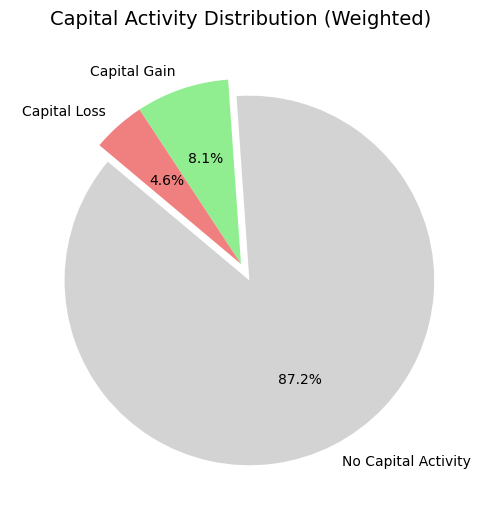

In [27]:
# Total weighted population
total_weight = working_df['fnlwgt'].sum()

# Individuals with any capital activity (gain > 0 or loss > 0)
activity_gain_weight = working_df[(working_df['Capital_Gain'] > 0)]['fnlwgt'].sum()
activity_lose_weight = working_df[(working_df['Capital_Loss'] > 0)]['fnlwgt'].sum()

gain_prop= activity_gain_weight / total_weight * 100
lose_prop= activity_lose_weight / total_weight * 100

#pie chart for capital activity
labels = ['No Capital Activity', 'Capital Gain', 'Capital Loss']
sizes = [total_weight - (activity_gain_weight + activity_lose_weight), activity_gain_weight, activity_lose_weight]
colors = ['lightgrey', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode the 'No Capital Activity' slice    
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Capital Activity Distribution (Weighted)", fontsize=14)
plt.show()

In [28]:
# Ensure numeric
working_df['Capital_Gain'] = pd.to_numeric(working_df['Capital_Gain'], errors='coerce')
working_df['Capital_Loss'] = pd.to_numeric(working_df['Capital_Loss'], errors='coerce')

# Net Capital
working_df['Net_Capital'] = working_df['Capital_Gain'] - working_df['Capital_Loss']

# Capital Activity indicator (1 if gain>0 or loss>0, else 0)
working_df['Capital_Activity'] = ((working_df['Capital_Gain'] > 0) | (working_df['Capital_Loss'] > 0)).astype(int)

# --- Assuming you already have Age_Group and Hours_Group columns ---
grouped = working_df.groupby(['Age_Group', 'Hours_Group']).apply(
    lambda g: pd.Series({
        'Avg_Net_Capital': np.average(g['Net_Capital'], weights=g['fnlwgt']),
        'Prop_Capital_Activity': np.average(g['Capital_Activity'], weights=g['fnlwgt'])
    })
).reset_index()

print(grouped)


   Age_Group Hours_Group  Avg_Net_Capital  Prop_Capital_Activity
0      Adult   Full-time       702.551359               0.119738
1      Adult   Over-time      2113.244559               0.199754
2      Adult   Part-time       105.143016               0.083641
3      Child   Full-time       190.520395               0.043596
4      Child   Over-time         0.000000               0.000000
5      Child   Part-time       -38.515951               0.053051
6     Senior   Full-time      1162.916228               0.154380
7     Senior   Over-time      3110.515632               0.236522
8     Senior   Part-time       564.510863               0.160983
9      Youth   Full-time       150.075360               0.058188
10     Youth   Over-time       396.041425               0.097185
11     Youth   Part-time       118.127555               0.042948


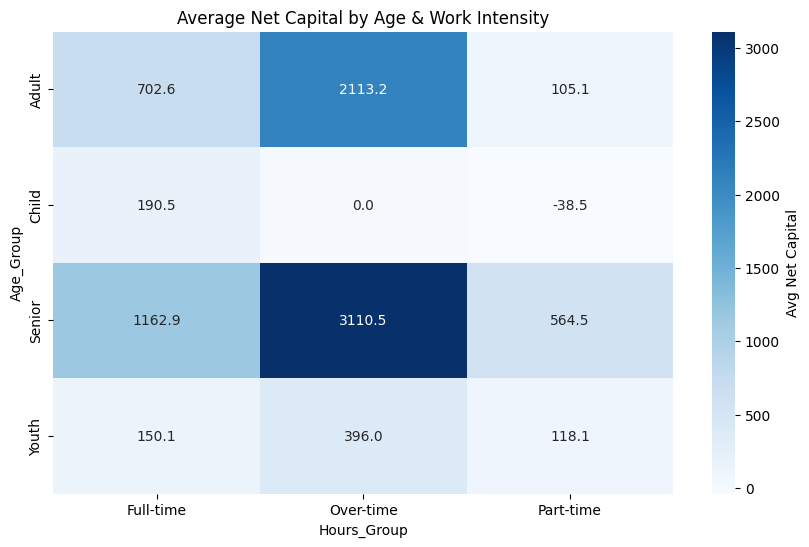

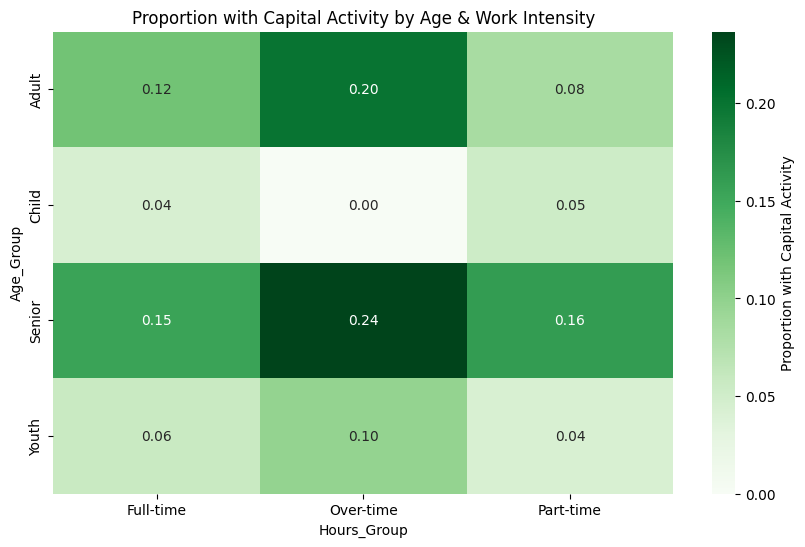

In [29]:
# --- Heatmap for Average Net Capital ---
pivot_capital = grouped.pivot(index="Age_Group", columns="Hours_Group", values="Avg_Net_Capital")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_capital, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Avg Net Capital'})
plt.title("Average Net Capital by Age & Work Intensity")
plt.show()

# --- Heatmap for Proportion with Capital Activity ---
pivot_activity = grouped.pivot(index="Age_Group", columns="Hours_Group", values="Prop_Capital_Activity")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_activity, annot=True, fmt=".2f", cmap="Greens", cbar_kws={'label': 'Proportion with Capital Activity'})
plt.title("Proportion with Capital Activity by Age & Work Intensity")
plt.show()

#### QUESTION 4